In [1]:
!pip install simpleaudio
!pip install opencv-python
!pip install plotly
import numpy as np
import matplotlib.pyplot as plt
import cis
import scipy.fftpack as sfft
import matplotlib.mlab as mlab
import scipy.signal as ss

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



In [2]:
t = np.arange(0,1,1/8000)
a = 0.8
f = 440
y = a*np.sin(2*np.pi*f*t)

In [3]:
np.set_printoptions(precision=3)
y2 = np.sin(np.arange(0,1,0.01))

In [4]:
cis.audioplay(y,8000)

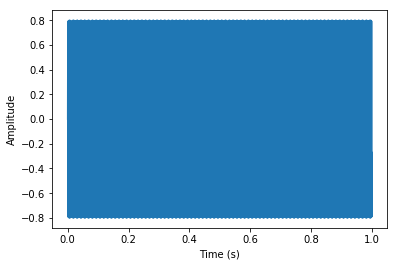

In [5]:
plt.figure()
plt.plot(t,y,'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

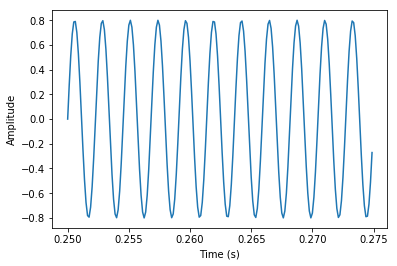

In [6]:
r = np.arange(2000,2200)
plt.figure()
plt.plot(t[r],y[r],'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

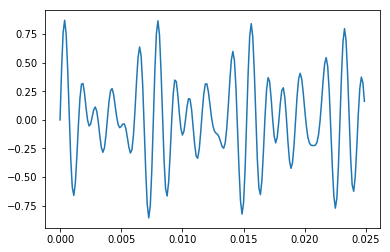

In [7]:
# 波形の重ね合わせ
fs = 8000
t = np.arange(0,1,1/fs)
a = 0.3
y523 = a*np.sin(2*np.pi*523*t)
y660 = a*np.sin(2*np.pi*660*t)
y784 = a*np.sin(2*np.pi*784*t)
yy = y523+y660+y784
cis.audioplay(yy,fs)
r = np.arange(200)
plt.figure()
plt.plot(t[r],yy[r])
plt.show()

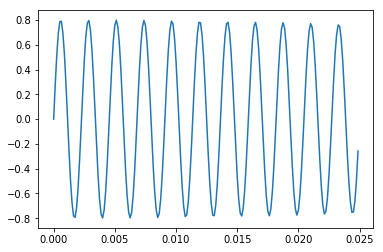

In [8]:
a = 0.4
y438 = a*np.sin(2*np.pi*438*t)
y442 = a*np.sin(2*np.pi*442*t)
yy = y438+y442
cis.audioplay(yy,fs)
r = np.arange(200)
plt.figure()
plt.plot(t[r],yy[r])
plt.show()

In [9]:
# 連続再生
cis.audioplay(np.hstack((y523,y660)),fs)

In [10]:
v, fs = cis.wavread('audio/vibra8.wav')
t = np.arange(0,1,1/fs)
f = 440
a = 0.1
ysin = a*np.sin(2*np.pi*f*t)
# vmix = v+ysin
print(v.shape)
print(ysin.shape)

(26000,)
(8000,)


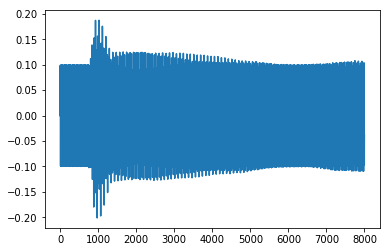

In [11]:
vmix = v[7000:15000]+ysin
cis.audioplay(vmix,fs)
plt.figure()
plt.plot(vmix)
plt.show()

In [12]:
# 保存
cis.wavwrite('audio/mixed.wav',vmix,fs)

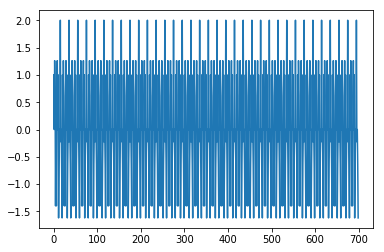

In [13]:
# FFT
fs = 100
t = np.arange(0,7,1/fs)
y = np.sin(2*np.pi*15*t)+np.cos(2*np.pi*40*t)
cs = sfft.fft(y[:600])
plt.figure()
plt.plot(y,'-')
#plt.plot(np.abs(cs),'--')
plt.show()

In [14]:
(np.abs(cs)>250).nonzero()

(array([ 90, 240, 360, 510]),)

In [15]:
print(cs[90])
print(cs[240])

(-7.972289495228324e-12-300.0000000000002j)
(300.0000000000008-6.551204023708124e-12j)


In [16]:
np.angle(cs[np.array([90,240])])

array([-1.571e+00, -2.184e-14])

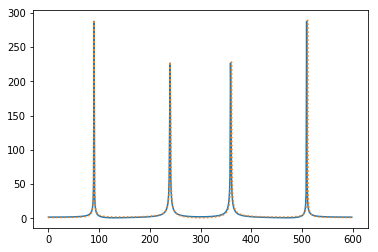

In [17]:
# フーリへ変換が問題になる例
plt.plot(np.abs(sfft.fft(y[0:599])))
plt.plot(np.abs(sfft.fft(y[0:601])),':')
plt.show()

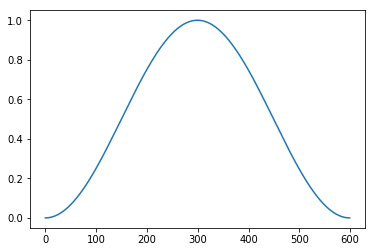

In [18]:
# ハン窓
w = np.hanning(600)
plt.plot(w)
plt.show()

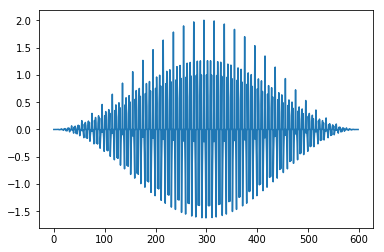

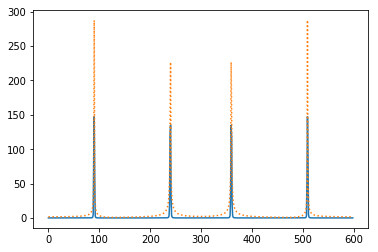

In [19]:
# ハン窓をかける
hy = y[:599]*np.hanning(599)
plt.plot(hy)
plt.show()
hcs = sfft.fft(hy)
plt.plot(np.abs(hcs))
lcs = sfft.fft(y[:599])
plt.plot(np.abs(lcs),':')
plt.show()

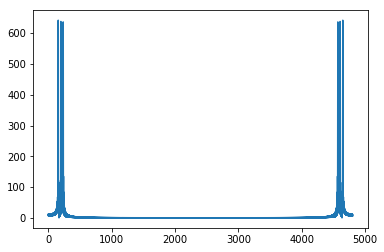

In [20]:
# フレーム処理
y,fs = cis.wavread('audio/domiso.wav')
plt.plot(np.abs(sfft.fft(y)))
plt.show()
cis.audioplay(y,fs)

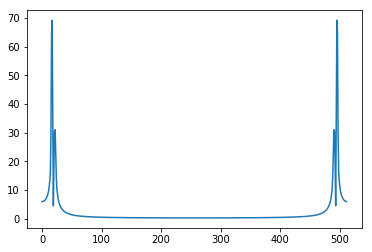

In [21]:
plt.plot(np.abs(sfft.fft(y[1300:1812]*np.hanning(512))))
plt.show()

In [22]:
S,F,T = mlab.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128,mode='complex',sides='twosided')
S.shape

(256, 36)

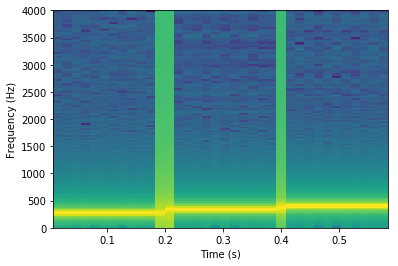

In [23]:
_,_,_,_ = plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)
_ = plt.xlabel('Time (s)')
_ = plt.ylabel('Frequency (Hz)')
plt.show()

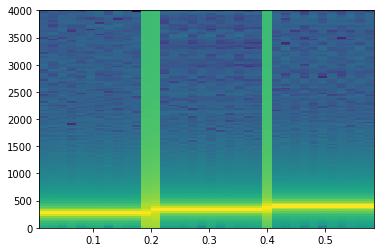

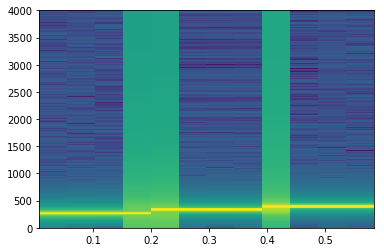

In [24]:
plt.figure(1)
P,F,T,im = plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)
plt.figure(2)
P,F,T,im = plt.specgram(y,Fs=fs,NFFT=512,window=np.hanning(512),noverlap=128)
plt.show()

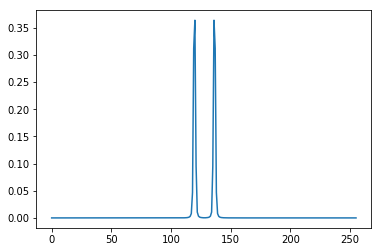

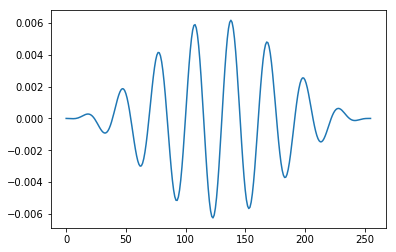

In [25]:
# 逆フーリエ変換
S09 = S[:,9]
plt.plot(np.abs(S09))
plt.show()
plt.plot(np.real(sfft.ifft(sfft.fftshift(S09))))
plt.show()